In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import matthews_corrcoef

#### 1. Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

In [2]:
water = pd.read_csv('water.txt', sep='\t', header=0)
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [3]:
water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

(-0.6548486232042466, 1.0331339260349462e-08)


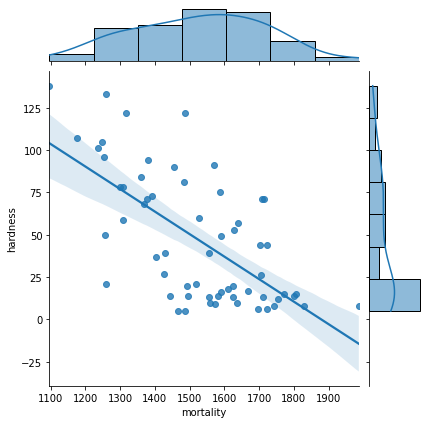

In [4]:
print(stats.pearsonr(water.mortality, water.hardness))

water.corr(method='pearson')

sns.jointplot(x='mortality', y='hardness', data=water, kind='reg')

#### 2. В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [5]:
print(stats.spearmanr(water.mortality, water.hardness))

water.corr(method='spearman')

SpearmanrResult(correlation=-0.6316646189166502, pvalue=4.79546153722838e-08)


,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


#### 3. Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [6]:
south_towns, north_towns = water[water.location == 'South'], water[water.location == 'North']

south_corr = stats.pearsonr(south_towns.mortality, south_towns.hardness)[0]
north_corr = stats.pearsonr(north_towns.mortality, north_towns.hardness)[0]

print(f'Корреляция Пирсона в южных городах: {south_corr}, и северных : {north_corr}')

Корреляция Пирсона в южных городах: -0.6021532715484159, и северных : -0.36859783832887183


#### 4. Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [7]:
# X1 = men/women, X2 = often, rarely

bar_data = np.array([[203., 239.], 
                     [718., 515.]])

table = bar_data.flatten()

def matthewsr(a, b, c, d):
    return (a * d - b * c) / np.sqrt((a + b)*(a + c)*(b + d)*(c + d))

print(f'Matthews correlation coef: {matthewsr(*table):.4f}')

Matthews correlation coef: -0.1090


#### 5. В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5×10−85.5\times10^{-8}5.5×10−8, нужно ввести 8).

In [8]:
print(stats.chi2_contingency(bar_data))
print(f'Matthews corr p-value: {stats.chi2_contingency(bar_data)[1]}')

(19.40753078854304, 1.0558987006638725e-05, 1, array([[243.03402985, 198.96597015],
       [677.96597015, 555.03402985]]))
Matthews corr p-value: 1.0558987006638725e-05


#### 6. В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [9]:
def prop_diff_confint(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = sample1[0] / np.sum(sample1)
    p2 = sample2[0] / np.sum(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    
    return (left_boundary, right_boundary)

print(f'95% confidence interval for a difference of proportions: \
{prop_diff_confint(bar_data[:, 1], bar_data[:, 0])}')

95% confidence interval for a difference of proportions: (0.053905233215813156, 0.13922183141523897)


#### 7. Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили $5.5×10−85.5\times10^{-8}5.5×10−8$, нужно ввести 8).

In [10]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)
    
print(f'p-value: {proportions_diff_z_test(proportions_diff_z_stat_ind(bar_data[:, 1], bar_data[:, 0]))}')

p-value: 8.153453089576601e-06


#### 8. Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

| | Не доволен | Более или менее |	Доволен
|-|----------|----------|----------|
| Не очень счастлив | 197 | 111 | 33
| Достаточно счастлив | 382	|685 |331
| Очень счастлив | 110 |342 |333

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [11]:
survey = np.array([[197., 111., 33.],
                   [382., 685., 331.],
                   [110., 342., 333.]])

In [12]:
print(stats.chi2_contingency(survey))
print(f'Chi squared statistics: {stats.chi2_contingency(survey)[0]}')

(293.68311039689746, 2.4964299580093467e-62, 4, array([[ 93.08597464, 153.74722662,  94.16679873],
       [381.6251981 , 630.318542  , 386.0562599 ],
       [214.28882726, 353.93423138, 216.77694136]]))
Chi squared statistics: 293.68311039689746


#### 9. На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили $5.5×10−85.5\times10^{-8}5.5×10−8$, нужно ввести 8).

In [13]:
print(f'Chi-squared p-value: {stats.chi2_contingency(survey)[1]}')

Chi-squared p-value: 2.4964299580093467e-62


#### 10. Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

$$ \phi_C(X_1^n, X_2^n) =  \frac{\chi^2(X_1^n, X_2^n)}{n * min(K_1, K_2) - 1)}$$

In [14]:
def cramer_coef(contingency_table):
    chi_2_stat = stats.chi2_contingency(contingency_table)[0]
    n = np.sum(contingency_table)
    return np.sqrt(chi_2_stat / (n * (min(contingency_table.shape) - 1)))

print(f'Cramer coef value: {cramer_coef(survey):.4f}')

Cramer coef value: 0.2412
